### **Pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language**

## **API Reference**

pandas.errors: Custom exception and warnings classes that are raised by pandas.

pandas.plotting: Plotting public API.

pandas.testing: Functions that are useful for writing tests involving pandas objects.

pandas.api.extensions: Functions and classes for extending pandas objects.

pandas.api.indexers: Functions and classes for rolling window indexers.

pandas.api.interchange: DataFrame interchange protocol.

pandas.api.types: Datatype classes and functions.

pandas.api.typing: Classes that may be necessary for type-hinting. These are classes that are encountered as intermediate results but should not be instantiated directly by users.

pandas.io

pandas.tseries

In [1]:
In [1]: import numpy as np

In [2]: import pandas as pd

# **Basic data structures in pandas**

Series: 1D labeled array holding data types
such as integers, strings, Python objects etc.

DataFrame: 2D data structure that holds data like a 2D array or a table with rows and columns.

# **Object creation**

Creating a Series by passing a list of values, letting pandas create a default RangeIndex

In [2]:
In [3]: s = pd.Series([1, 3, 5, np.nan, 6, 8])

In [4]: s

,0
0,1.0
1,3.0
2,5.0
3,NaN
4,6.0
5,8.0


Creating a DataFrame by passing a NumPy array with a datetime index using date_range() and labeled columns

In [3]:
In [5]: dates = pd.date_range("20130101", periods=6)

In [6]: dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:

In [7]: df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))

In [8]: df


,A,B,C,D
2013-01-01,-0.176561,1.045229,-1.555139,-0.417582
2013-01-02,0.001931,0.417970,-0.489024,-0.617815
2013-01-03,-1.315644,1.203979,0.737929,-1.285193
2013-01-04,0.503960,-0.060700,1.610659,-0.474795
2013-01-05,-0.049340,0.629286,1.739975,-0.577084
2013-01-06,0.202263,-0.665797,1.643037,-0.536947


Creating a DataFrame by passing a dictionary of objects where the keys are the column labels and the values are the column values

In [5]:
In [9]: df2 = pd.DataFrame(
   ...:     {
   ...:         "A": 1.0,
   ...:         "B": pd.Timestamp("20130102"),
   ...:         "C": pd.Series(1, index=list(range(4)), dtype="float32"),
   ...:         "D": np.array([3] * 4, dtype="int32"),
   ...:         "E": pd.Categorical(["test", "train", "test", "train"]),
   ...:         "F": "foo",
   ...:     }
   ...: )
   ...:

In [10]: df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [6]:
In [11]: df2.dtypes

,0
A,float64
B,datetime64[s]
C,float32
D,int32
E,category
F,object


In [12]: df2.<TAB>  # noqa: E225, E999
df2.A                  df2.bool
df2.abs                df2.boxplot
df2.add                df2.C
df2.add_prefix         df2.clip
df2.add_suffix         df2.columns
df2.align              df2.copy
df2.all                df2.count
df2.any                df2.combine
df2.append             df2.D
df2.apply              df2.describe
df2.applymap           df2.diff
df2.B                  df2.duplicated

# **Viewing data**

Use DataFrame.head() and DataFrame.tail() to view the top and bottom rows of the frame respectively

In [7]:
In [13]: df.head()

,A,B,C,D
2013-01-01,-0.176561,1.045229,-1.555139,-0.417582
2013-01-02,0.001931,0.417970,-0.489024,-0.617815
2013-01-03,-1.315644,1.203979,0.737929,-1.285193
2013-01-04,0.503960,-0.060700,1.610659,-0.474795
2013-01-05,-0.049340,0.629286,1.739975,-0.577084


In [8]:

In [14]: df.tail(3)

,A,B,C,D
2013-01-04,0.503960,-0.060700,1.610659,-0.474795
2013-01-05,-0.049340,0.629286,1.739975,-0.577084
2013-01-06,0.202263,-0.665797,1.643037,-0.536947


In [9]:
In [15]: df.index


DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
In [16]: df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [11]:
In [17]: df.to_numpy()

array([[-0.17656121,  1.04522889, -1.55513896, -0.41758248],
       [ 0.00193081,  0.41797028, -0.48902371, -0.61781522],
       [-1.31564372,  1.20397934,  0.73792943, -1.28519336],
       [ 0.5039601 , -0.06069991,  1.61065945, -0.47479497],
       [-0.04934037,  0.62928632,  1.73997499, -0.57708399],
       [ 0.2022627 , -0.66579693,  1.64303703, -0.53694706]])

In [12]:
In [18]: df2.dtypes

,0
A,float64
B,datetime64[s]
C,float32
D,int32
E,category
F,object


In [13]:
In [19]: df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

describe() shows a quick statistic summary of your data

In [14]:
In [20]: df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.138899,0.428328,0.614573,-0.651570
std,0.623484,0.701278,1.360680,0.318529
min,-1.315644,-0.665797,-1.555139,-1.285193
25%,-0.144756,0.058968,-0.182285,-0.607632
50%,-0.023705,0.523628,1.174294,-0.557016
75%,0.152180,0.941243,1.634943,-0.490333
max,0.503960,1.203979,1.739975,-0.417582


In [15]:
In [21]: df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.176561,0.001931,-1.315644,0.503960,-0.049340,0.202263
B,1.045229,0.417970,1.203979,-0.060700,0.629286,-0.665797
C,-1.555139,-0.489024,0.737929,1.610659,1.739975,1.643037
D,-0.417582,-0.617815,-1.285193,-0.474795,-0.577084,-0.536947


DataFrame.sort_index() sorts by an axis

In [16]:
In [22]: df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.417582,-1.555139,1.045229,-0.176561
2013-01-02,-0.617815,-0.489024,0.417970,0.001931
2013-01-03,-1.285193,0.737929,1.203979,-1.315644
2013-01-04,-0.474795,1.610659,-0.060700,0.503960
2013-01-05,-0.577084,1.739975,0.629286,-0.049340
2013-01-06,-0.536947,1.643037,-0.665797,0.202263


DataFrame.sort_values() sorts by values

In [17]:
In [23]: df.sort_values(by="B")

,A,B,C,D
2013-01-06,0.202263,-0.665797,1.643037,-0.536947
2013-01-04,0.503960,-0.060700,1.610659,-0.474795
2013-01-02,0.001931,0.417970,-0.489024,-0.617815
2013-01-05,-0.049340,0.629286,1.739975,-0.577084
2013-01-01,-0.176561,1.045229,-1.555139,-0.417582
2013-01-03,-1.315644,1.203979,0.737929,-1.285193


# **Selection**

1. Getitem ([])

In [18]:
In [24]: df["A"]

,A
2013-01-01,-0.176561
2013-01-02,0.001931
2013-01-03,-1.315644
2013-01-04,0.503960
2013-01-05,-0.049340
2013-01-06,0.202263


In [19]:
In [25]: df[0:3]

,A,B,C,D
2013-01-01,-0.176561,1.045229,-1.555139,-0.417582
2013-01-02,0.001931,0.417970,-0.489024,-0.617815
2013-01-03,-1.315644,1.203979,0.737929,-1.285193


In [20]:

In [26]: df["20130102":"20130104"]

,A,B,C,D
2013-01-02,0.001931,0.417970,-0.489024,-0.617815
2013-01-03,-1.315644,1.203979,0.737929,-1.285193
2013-01-04,0.503960,-0.060700,1.610659,-0.474795


2. Selection by label

In [21]:
In [27]: df.loc[dates[0]]

,2013-01-01
A,-0.176561
B,1.045229
C,-1.555139
D,-0.417582


In [22]:
In [28]: df.loc[:, ["A", "B"]]

,A,B
2013-01-01,-0.176561,1.045229
2013-01-02,0.001931,0.417970
2013-01-03,-1.315644,1.203979
2013-01-04,0.503960,-0.060700
2013-01-05,-0.049340,0.629286
2013-01-06,0.202263,-0.665797


In [23]:
In [29]: df.loc["20130102":"20130104", ["A", "B"]]

,A,B
2013-01-02,0.001931,0.417970
2013-01-03,-1.315644,1.203979
2013-01-04,0.503960,-0.060700


In [24]:
In [30]: df.loc[dates[0], "A"]

-0.17656120650293758

In [25]:
In [31]: df.at[dates[0], "A"]

-0.17656120650293758

3. Selection by position

In [26]:
In [32]: df.iloc[3]

,2013-01-04
A,0.503960
B,-0.060700
C,1.610659
D,-0.474795


In [27]:
In [33]: df.iloc[3:5, 0:2]

,A,B
2013-01-04,0.50396,-0.060700
2013-01-05,-0.04934,0.629286


In [28]:
In [34]: df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,0.001931,-0.489024
2013-01-03,-1.315644,0.737929
2013-01-05,-0.049340,1.739975


In [29]:
In [35]: df.iloc[1:3, :]

,A,B,C,D
2013-01-02,0.001931,0.417970,-0.489024,-0.617815
2013-01-03,-1.315644,1.203979,0.737929,-1.285193


In [30]:
In [36]: df.iloc[:, 1:3]

,B,C
2013-01-01,1.045229,-1.555139
2013-01-02,0.417970,-0.489024
2013-01-03,1.203979,0.737929
2013-01-04,-0.060700,1.610659
2013-01-05,0.629286,1.739975
2013-01-06,-0.665797,1.643037


In [31]:
In [37]: df.iloc[1, 1]

0.4179702768561392

In [32]:
In [38]: df.iat[1, 1]

0.4179702768561392

3. Boolean indexing

In [33]:
In [39]: df[df["A"] > 0]

,A,B,C,D
2013-01-02,0.001931,0.417970,-0.489024,-0.617815
2013-01-04,0.503960,-0.060700,1.610659,-0.474795
2013-01-06,0.202263,-0.665797,1.643037,-0.536947


In [34]:
In [40]: df[df > 0]

,A,B,C,D
2013-01-01,NaN,1.045229,NaN,NaN
2013-01-02,0.001931,0.417970,NaN,NaN
2013-01-03,NaN,1.203979,0.737929,NaN
2013-01-04,0.503960,NaN,1.610659,NaN
2013-01-05,NaN,0.629286,1.739975,NaN
2013-01-06,0.202263,NaN,1.643037,NaN


In [35]:
In [41]: df2 = df.copy()

In [36]:
In [42]: df2["E"] = ["one", "one", "two", "three", "four", "three"]

In [37]:
In [43]: df2

,A,B,C,D,E
2013-01-01,-0.176561,1.045229,-1.555139,-0.417582,one
2013-01-02,0.001931,0.417970,-0.489024,-0.617815,one
2013-01-03,-1.315644,1.203979,0.737929,-1.285193,two
2013-01-04,0.503960,-0.060700,1.610659,-0.474795,three
2013-01-05,-0.049340,0.629286,1.739975,-0.577084,four
2013-01-06,0.202263,-0.665797,1.643037,-0.536947,three


In [38]:

In [44]: df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,-1.315644,1.203979,0.737929,-1.285193,two
2013-01-05,-0.049340,0.629286,1.739975,-0.577084,four


5. Setting

In [39]:
In [45]: s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))

In [40]:
In [47]: df["F"] = s1

In [41]:
In [48]: df.at[dates[0], "A"] = 0

In [42]:
In [49]: df.iat[0, 1] = 0

In [43]:
In [50]: df.loc[:, "D"] = np.array([5] * len(df))

In [44]:
In [51]: df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.555139,5.0,NaN
2013-01-02,0.001931,0.417970,-0.489024,5.0,1.0
2013-01-03,-1.315644,1.203979,0.737929,5.0,2.0
2013-01-04,0.503960,-0.060700,1.610659,5.0,3.0
2013-01-05,-0.049340,0.629286,1.739975,5.0,4.0
2013-01-06,0.202263,-0.665797,1.643037,5.0,5.0


In [45]:
In [52]: df2 = df.copy()


In [46]:

In [53]: df2[df2 > 0] = -df2

In [47]:
In [54]: df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.555139,-5.0,NaN
2013-01-02,-0.001931,-0.417970,-0.489024,-5.0,-1.0
2013-01-03,-1.315644,-1.203979,-0.737929,-5.0,-2.0
2013-01-04,-0.503960,-0.060700,-1.610659,-5.0,-3.0
2013-01-05,-0.049340,-0.629286,-1.739975,-5.0,-4.0
2013-01-06,-0.202263,-0.665797,-1.643037,-5.0,-5.0


# **Missing data**

np.nan represents missing data

Reindexing allows you to change/add/delete the index on a specified axis

In [48]:
In [55]: df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])

In [49]:
In [56]: df1.loc[dates[0] : dates[1], "E"] = 1

In [50]:

In [57]: df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.555139,5.0,NaN,1.0
2013-01-02,0.001931,0.417970,-0.489024,5.0,1.0,1.0
2013-01-03,-1.315644,1.203979,0.737929,5.0,2.0,NaN
2013-01-04,0.503960,-0.060700,1.610659,5.0,3.0,NaN


DataFrame.dropna() drops any rows that have missing data

In [51]:
In [58]: df1.dropna(how="any")

,A,B,C,D,F,E
2013-01-02,0.001931,0.41797,-0.489024,5.0,1.0,1.0



DataFrame.fillna() fills missing data

In [52]:
In [59]: df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.555139,5.0,5.0,1.0
2013-01-02,0.001931,0.417970,-0.489024,5.0,1.0,1.0
2013-01-03,-1.315644,1.203979,0.737929,5.0,2.0,5.0
2013-01-04,0.503960,-0.060700,1.610659,5.0,3.0,5.0


isna() gets the boolean mask where values are nan

In [53]:
In [60]: pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


# **Operations**

Stats: exclude missing data

In [54]:
In [61]: df.mean()

,0
A,-0.109472
B,0.254123
C,0.614573
D,5.000000
F,3.000000


In [55]:
In [62]: df.mean(axis=1)

,0
2013-01-01,0.861215
2013-01-02,1.186175
2013-01-03,1.525253
2013-01-04,2.010784
2013-01-05,2.263984
2013-01-06,2.235901


In [56]:
In [63]: s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)

In [64]: s

,0
2013-01-01,NaN
2013-01-02,NaN
2013-01-03,1.0
2013-01-04,3.0
2013-01-05,5.0
2013-01-06,NaN


In [57]:
In [65]: df.sub(s, axis="index")

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-2.315644,0.203979,-0.262071,4.0,1.0
2013-01-04,-2.496040,-3.060700,-1.389341,2.0,0.0
2013-01-05,-5.049340,-4.370714,-3.260025,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


User defined functions: DataFrame.agg() and DataFrame.transform() applies a user defined function that reduces or broadcasts its result respectively.

In [58]:
In [66]: df.agg(lambda x: np.mean(x) * 5.6)

,0
A,-0.613042
B,1.423090
C,3.441609
D,28.000000
F,16.800000


In [59]:
In [67]: df.transform(lambda x: x * 101.2)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-157.380063,506.0,NaN
2013-01-02,0.195398,42.298592,-49.489200,506.0,101.2
2013-01-03,-133.143144,121.842710,74.678458,506.0,202.4
2013-01-04,51.000762,-6.142831,162.998736,506.0,303.6
2013-01-05,-4.993246,63.683776,176.085469,506.0,404.8
2013-01-06,20.468985,-67.378649,166.275348,506.0,506.0


Value Counts

In [60]:
In [68]: s = pd.Series(np.random.randint(0, 7, size=10))

In [69]: s

,0
0,3
1,1
2,0
3,2
4,4
5,2
6,4
7,4
8,2
9,2


In [61]:
In [70]: s.value_counts()

,count
2,4
4,3
3,1
1,1
0,1


String Methods

In [62]:
In [71]: s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])

In [72]: s.str.lower()

,0
0,a
1,b
2,c
3,aaba
4,baca
5,NaN
6,caba
7,dog
8,cat


# **Merge**

Concat

In [63]:
In [73]: df = pd.DataFrame(np.random.randn(10, 4))

In [74]: df

,0,1,2,3
0,0.490360,0.010630,-1.469411,-0.701555
1,-0.223030,0.188428,0.329515,-1.043646
2,-1.765333,0.582814,0.976416,1.328257
3,-0.937951,0.526924,-1.540908,0.083997
4,0.383417,0.048477,1.334946,0.845943
5,2.471920,1.808514,1.353239,-1.200967
6,-1.494510,-0.702269,0.063251,-1.633973
7,0.431061,0.456757,-2.411493,-1.691382
8,1.880040,-0.451532,0.288611,-0.268862
9,-0.915097,-1.868042,-0.454740,-0.182717


In [64]:
# break it into pieces
In [75]: pieces = [df[:3], df[3:7], df[7:]]

In [76]: pd.concat(pieces)

,0,1,2,3
0,0.490360,0.010630,-1.469411,-0.701555
1,-0.223030,0.188428,0.329515,-1.043646
2,-1.765333,0.582814,0.976416,1.328257
3,-0.937951,0.526924,-1.540908,0.083997
4,0.383417,0.048477,1.334946,0.845943
5,2.471920,1.808514,1.353239,-1.200967
6,-1.494510,-0.702269,0.063251,-1.633973
7,0.431061,0.456757,-2.411493,-1.691382
8,1.880040,-0.451532,0.288611,-0.268862
9,-0.915097,-1.868042,-0.454740,-0.182717


Join

In [65]:
In [77]: left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})

In [78]: right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})

In [79]: left


,key,lval
0,foo,1
1,foo,2


In [66]:
In [80]: right

,key,rval
0,foo,4
1,foo,5


In [67]:
In [81]: pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [68]:
In [82]: left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})

In [83]: right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})

In [84]: left

,key,lval
0,foo,1
1,bar,2


In [69]:
In [85]: right

,key,rval
0,foo,4
1,bar,5


In [70]:
In [86]: pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


# **Grouping**

Splitting the data into groups based on some criteria

Applying a function to each group independently

Combining the results into a data structure

In [71]:
In [87]: df = pd.DataFrame(
   ....:     {
   ....:         "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
   ....:         "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
   ....:         "C": np.random.randn(8),
   ....:         "D": np.random.randn(8),
   ....:     }
   ....: )
   ....:

In [88]: df

,A,B,C,D
0,foo,one,0.336159,0.545625
1,bar,one,-0.055781,0.723968
2,foo,two,0.473502,0.669092
3,bar,three,0.590595,-1.536383
4,foo,two,-0.034710,-1.156395
5,bar,two,-0.311617,-0.249302
6,foo,one,0.401551,-0.319112
7,foo,three,-0.674127,-1.362838


In [72]:
In [89]: df.groupby("A")[["C", "D"]].sum()

,C,D
A,,
bar,0.223197,-1.061717
foo,0.502375,-1.623627


In [73]:
In [90]: df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one   -0.055781  0.723968
    three  0.590595 -1.536383
    two   -0.311617 -0.249302
foo one    0.737710  0.226513
    three -0.674127 -1.362838
    two    0.438792 -0.487303

# **Reshaping**

Stack

stack() method “compresses” a level in the DataFrame’s columns

In [74]:
In [91]: arrays = [
   ....:    ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
   ....:    ["one", "two", "one", "two", "one", "two", "one", "two"],
   ....: ]
   ....:

In [92]: index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])


In [75]:
In [93]: df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])

In [76]:
In [94]: df2 = df[:4]

In [95]: df2

A         B
first second                    
bar   one    -0.500005 -0.978698
      two     0.993277  2.014332
baz   one    -0.197767  0.025507
      two     1.331446 -0.172642

In [77]:
In [96]: stacked = df2.stack(future_stack=True)

In [97]: stacked

first  second   
bar    one     A   -0.500005
               B   -0.978698
       two     A    0.993277
               B    2.014332
baz    one     A   -0.197767
               B    0.025507
       two     A    1.331446
               B   -0.172642
dtype: float64

In [78]:
In [98]: stacked.unstack()

A         B
first second                    
bar   one    -0.500005 -0.978698
      two     0.993277  2.014332
baz   one    -0.197767  0.025507
      two     1.331446 -0.172642

In [79]:
In [99]: stacked.unstack(1)

second        one       two
first                      
bar   A -0.500005  0.993277
      B -0.978698  2.014332
baz   A -0.197767  1.331446
      B  0.025507 -0.172642

In [80]:
In [100]: stacked.unstack(0)

first          bar       baz
second                      
one    A -0.500005 -0.197767
       B -0.978698  0.025507
two    A  0.993277  1.331446
       B  2.014332 -0.172642

Pivot tables

pivot_table() pivots a DataFrame specifying the values, index and columns

In [81]:
In [101]: df = pd.DataFrame(
   .....:     {
   .....:         "A": ["one", "one", "two", "three"] * 3,
   .....:         "B": ["A", "B", "C"] * 4,
   .....:         "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
   .....:         "D": np.random.randn(12),
   .....:         "E": np.random.randn(12),
   .....:     }
   .....: )
   .....:

In [102]: df

,A,B,C,D,E
0,one,A,foo,-0.241121,1.538183
1,one,B,foo,-0.667869,-2.203686
2,two,C,foo,0.255034,2.191415
3,three,A,bar,-0.775433,-1.592763
4,one,B,bar,-1.499948,-1.230801
5,one,C,bar,1.111792,0.097635
6,two,A,foo,-0.191653,-0.055661
7,three,B,foo,-0.122200,-1.517827
8,one,C,foo,0.842303,0.915991
9,one,A,bar,-0.819833,0.079429


In [82]:
In [103]: pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A -0.819833 -0.241121
      B -1.499948 -0.667869
      C  1.111792  0.842303
three A -0.775433       NaN
      B       NaN -0.122200
      C -0.455518       NaN
two   A       NaN -0.191653
      B -0.591528       NaN
      C       NaN  0.255034

# **Time series**

In [83]:
In [104]: rng = pd.date_range("1/1/2012", periods=100, freq="s")

In [105]: ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [106]: ts.resample("5Min").sum()

,0
2012-01-01,25027


Series.tz_localize() localizes a time series to a time zone

In [84]:
In [107]: rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")

In [108]: ts = pd.Series(np.random.randn(len(rng)), rng)

In [109]: ts

,0
2012-03-06,1.971688
2012-03-07,-0.011293
2012-03-08,1.320048
2012-03-09,-1.042392
2012-03-10,-0.666740


In [85]:

In [110]: ts_utc = ts.tz_localize("UTC")

In [111]: ts_utc

,0
2012-03-06 00:00:00+00:00,1.971688
2012-03-07 00:00:00+00:00,-0.011293
2012-03-08 00:00:00+00:00,1.320048
2012-03-09 00:00:00+00:00,-1.042392
2012-03-10 00:00:00+00:00,-0.666740


Series.tz_convert() converts a timezones aware time series to another time zone

In [86]:
In [107]: rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")

In [108]: ts = pd.Series(np.random.randn(len(rng)), rng)

In [109]: ts

,0
2012-03-06,0.687452
2012-03-07,-2.342170
2012-03-08,-0.571990
2012-03-09,1.145736
2012-03-10,-0.348871


In [87]:
In [110]: ts_utc = ts.tz_localize("UTC")

In [111]: ts_utc

,0
2012-03-06 00:00:00+00:00,0.687452
2012-03-07 00:00:00+00:00,-2.342170
2012-03-08 00:00:00+00:00,-0.571990
2012-03-09 00:00:00+00:00,1.145736
2012-03-10 00:00:00+00:00,-0.348871


In [88]:
In [112]: ts_utc.tz_convert("US/Eastern")

,0
2012-03-05 19:00:00-05:00,0.687452
2012-03-06 19:00:00-05:00,-2.342170
2012-03-07 19:00:00-05:00,-0.571990
2012-03-08 19:00:00-05:00,1.145736
2012-03-09 19:00:00-05:00,-0.348871


In [89]:
In [113]: rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [90]:
In [114]: rng + pd.offsets.BusinessDay(5)

DatetimeIndex(['2012-03-13', '2012-03-14', '2012-03-15', '2012-03-16',
               '2012-03-16'],
              dtype='datetime64[ns]', freq=None)

# **Categoricals**

In [91]:
In [115]: df = pd.DataFrame(
   .....:     {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
   .....: )
   .....:

In [92]:
In [116]: df["grade"] = df["raw_grade"].astype("category")

In [117]: df["grade"]

,grade
0,a
1,b
2,b
3,a
4,a
5,e


In [93]:
In [118]: new_categories = ["very good", "good", "very bad"]

In [119]: df["grade"] = df["grade"].cat.rename_categories(new_categories)

In [94]:
In [120]: df["grade"] = df["grade"].cat.set_categories(
   .....:     ["very bad", "bad", "medium", "good", "very good"]
   .....: )
   .....:

In [121]: df["grade"]

,grade
0,very good
1,good
2,good
3,very good
4,very good
5,very bad


In [95]:
In [122]: df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [96]:
In [123]: df.groupby("grade", observed=False).size()

,0
grade,
very bad,1
bad,0
medium,0
good,2
very good,3


# **Plotting**

plt.close method is used to close a figure window

In [97]:
In [124]: import matplotlib.pyplot as plt

In [125]: plt.close("all")

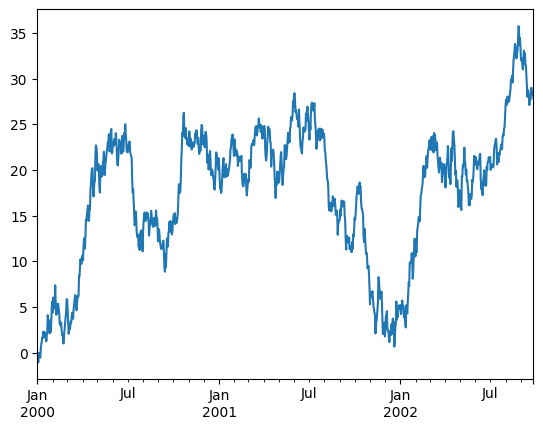

In [98]:
In [126]: ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

In [127]: ts = ts.cumsum()

In [128]: ts.plot();

<Figure size 640x480 with 0 Axes>

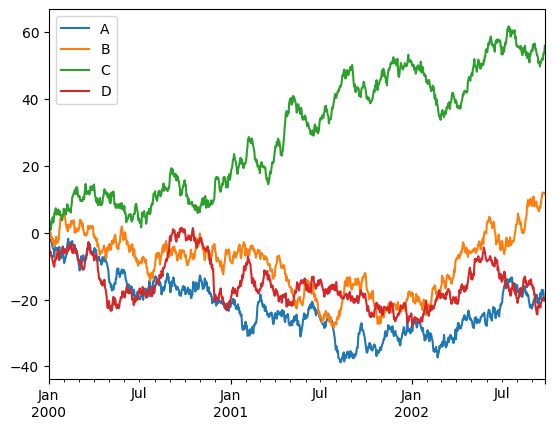

In [99]:
In [129]: df = pd.DataFrame(
   .....:     np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
   .....: )
   .....:

In [130]: df = df.cumsum()

In [131]: plt.figure();

In [132]: df.plot();

In [133]: plt.legend(loc='best');

# **Importing and exporting data**

CSV

In [100]:
In [134]: df = pd.DataFrame(np.random.randint(0, 5, (10, 5)))

In [135]: df.to_csv("foo.csv")

Parquet

In [101]:
In [137]: df.to_parquet("foo.parquet")

In [102]:
In [138]: pd.read_parquet("foo.parquet")

,0,1,2,3,4
0,0,2,2,2,2
1,0,0,2,0,3
2,1,3,2,2,3
3,1,2,4,0,1
4,1,1,2,2,2
5,3,4,3,1,2
6,4,4,3,0,1
7,4,0,0,3,1
8,0,2,4,2,0
9,3,1,3,3,0


Excel

In [103]:
In [139]: df.to_excel("foo.xlsx", sheet_name="Sheet1")

In [104]:
In [140]: pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,0,1,2,3,4
0,0,0,2,2,2,2
1,1,0,0,2,0,3
2,2,1,3,2,2,3
3,3,1,2,4,0,1
4,4,1,1,2,2,2
5,5,3,4,3,1,2
6,6,4,4,3,0,1
7,7,4,0,0,3,1
8,8,0,2,4,2,0
9,9,3,1,3,3,0


# **Gotchas**

In [105]:
In [141]: if pd.Series([False, True, False]):
   .....:      print("I was true")
   .....:


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().